# Introduction to Qubits

In this notebook we introduce the basic idea of qubits in a format that is friendly for quantum chemists, as such some knowledge of quantum mechanics and linear algebra is assumed. We shall also visualise basic qubits using IBM's qiskit python module. First we shall import all required python modules.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import qiskit as qk

### Classical Bits

Classical computers operate within a binary system. For example, everything can be represented by a 1 or 0. In the binary system, an integer $N$ can be represented by $n$ bits,

$$N = 2^{n-1}b_1 + 2^{n-2} b_2 + \ldots + 2^{0} b_n,$$

where $n$ is determined by the largest power $2^{n-1}$ that is less than $N$. Lets take 52 as an example:

- $2^5 = 32$ is the largest power of 2 possible
- Leaving a remainder of $52 - 32 = 20$
- 20 can be represented in base 2 as $2^4 + 2^2 = 16 + 4$

and therefore,

$$ 52 = 2^{5} 1 + 2^{4} 1 + 2^{3} 0 + 2^{2} 1 + 2^{1} 0 + 2^{0} 0 = 110100,$$

which is comprised of $n = 6$ bits.

We can check this as follows:

In [2]:
num = 52
binary_string = bin(52)
print(binary_string[2:])

110100


### Quantum Bits (Qubits)

Instead of representing information in terms of binary bits, we now turn to a representation based on the idea of state vectors (wavefunctions) in a quantum superposition.

In quantum chemistry we often approximately represent the electronic wavefunction of a molecule in terms of molecule orbitals ($\psi_m$) formed from the linear combination of atomic orbitals ($\phi_i$),

$$\psi_{m} = \sum_i c_i \phi_i.$$

Moreover, the time evolution of a wavepacket (i.e. a superposition of time-independent eigenstates of the Hamiltonian) is of the form,

$$ |\Psi\left(t\right)\rangle = \sum_n e^{\left(-iE_{n}t / \hbar \right)} |\psi_n\rangle,$$

where $\psi_n$ and $E_n$ are the stationary eigenstates and their associated eigenvalues (energies).



#### Basic Definition


In a similar fashion, we define the smallest bit of quanutm information (a qubit) as a simple two level quantum system,

$$|\psi\rangle = c_1 |\phi_1\rangle + c_2 |\phi_2\rangle,$$

where $c_1$ and $c_2$ are the complex expansion coefficients and the orthonormal state vectors $\phi_1\rangle$ and $\phi_2\rangle$ span the 2D Hilbert space on which the qubit $|\psi\rangle$ is defined. The real numbers $|c_1|^2$ and $|c_2|^2$ define the probability of observing the system in each state, and their sum $|c_1|^2 + |c_2|^2 = 1$. Note that here $|\phi\rangle$ just refers to a general quantum state to which we attribute no physical interpretation at the moment.


If you are familiar with quantum mechanics, you may be used to the notation of using $|\psi\rangle$ or $|\phi\rangle$ to denote state vectors. However, we shall instead follow the quantum computing convention of using $|q\rangle$, along with $|0\rangle$ and $|1\rangle$ as orthonormal basis vectors - here one can see the relation to the classical definition of binary bits. Moreover, if a general state vector $|i\rangle$ can only correspond to two values $|0\rangle$ and $|1\rangle$, we simplify $|i\rangle \in \{ |0\rangle, |1\rangle \}$ by instead writing $i \in \{0, 1\}$ (or sometimes $i = 0, 1$). Thus in this notation, if $i, j$ = $0, 1$, then $\langle i | j \rangle = \delta_{ij}$.



#### Hadamard basis

Another useful basis in the context of quantum computing is the Hadamard basis $\{ |+\rangle , |-\rangle \}$, which also spans the Hilbert space of a single qubit $\mathscr{H}_q$. The Hadamard basis vectors can be written in terms of the computational basis vectors $|0\rangle$ and $|1\rangle$ as,

$$ |+\rangle = \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle, \hspace{2em} |-\rangle = \frac{1}{\sqrt{2}} |0\rangle - \frac{1}{\sqrt{2}} |1\rangle.$$

As such, the computational basis vectors can also be written in terms of the Hadamard basis,

$$ |0\rangle = \frac{1}{\sqrt{2}} |+\rangle + \frac{1}{\sqrt{2}} |-\rangle, \hspace{2em} |1\rangle = \frac{1}{\sqrt{2}} |+\rangle - \frac{1}{\sqrt{2}} |-\rangle.$$

The state vector of a single qubit is can then be written as $|q\rangle = c_{+} |+\rangle + c_{-} |-\rangle$



#### Bloch Sphere

A single qubit $q$ is a function of two complex numbers (four total numbers), however we can reduce this to be a function of two variables by a change of variables. For this we introduce $\theta$ and $\phi$ with $\theta \in [0, \pi]$ and $\phi \in [0, 2\pi]$, now the complex expansion coefficients can be written as,

$$ |c_0|  = \cos(\theta/2), \hspace{2em} |c_1| = \sin(\theta/2) $$

Now the single qubit state vector can be represented on a Bloch sphere with spherical coordinates $(\theta, \phi)$, and is defined by,

$$ |q(\theta, \phi)\rangle = \cos(\theta/2) |0\rangle + e^{i\phi} \sin(\theta/2) |1\rangle,$$

where $|q(0, 0)\rangle = |0\rangle$ and $|q(\pi, 0)\rangle = |1\rangle$ - i.e. the computational basis vectors span the north $(+z)$ and south $(-z)$ poles of the Bloch sphere. The Hadamard basis vectors now span the $+x$ and $-x$ axes of the Bloch sphere, and are defined as,

$$|q(\pi/2, 0)\rangle = \frac{1}{2} |0\rangle + \frac{1}{2} |1\rangle = |+\rangle,$$
and
$$|q(\pi/2, \pi)\rangle = \frac{1}{2} |0\rangle - \frac{1}{2} |1\rangle = |-\rangle$$ 


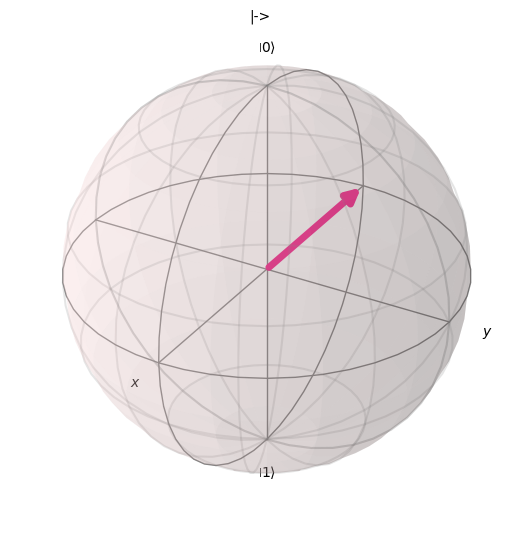

In [59]:
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([1, np.pi/2, 0], coord_type='spherical', title='|+>') # plot Hadamard basis vectors
plot_bloch_vector([1, np.pi/2, np.pi], coord_type='spherical', title='|->')

### Multiple Qubits

While a single qubit spans a 2D Hilbert space, two qubits span a space that is the tensor product of two 2D Hilbert spaces, $|q_2\rangle \in \mathcal{H}_{q2} = \mathcal{H}_{q1} \otimes \mathcal{H}_{q^{\prime}1} = \mathbb{C}^{2^2}$.

This is the same as the represenation of an $N$ dimensional wavefunction in direct product form within discrete variable representation in quantum chemistry. Here, assuming a basis of orthonormal coordinates, the $N$ dimensional wavefunction is represented as a tensor product of $N$ 1D basis functions. For example in 2D, KE matrix elements are then evaluated as,

$$ \langle \Phi_{i^{\prime} j^{\prime}} | T | \Phi_{ij} \rangle =  \langle \phi_{i^{\prime}} | T_x | \phi_{i} \rangle \otimes \delta_{jj^{\prime}} + \delta_{ii^{\prime}} \otimes \langle \phi_{j^{\prime}} | T_y | \phi_{j} \rangle $$

